In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [106]:
#importing data
lead_df = pd.read_csv("leads.csv")
pd.set_option('display.max_columns', None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [107]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [108]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [109]:
#missing data percentage

round(lead_df.isnull().sum()/lead_df.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [110]:
#looking at the above dataset we observed that following should be done
 # encoding categorical variables
 # missing value handling
 # convert the select into the NAN
 # dropping columns having more than 70% null values

In [111]:
# Encoding the vriables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']:
    
    lead_df[feature] = lead_df[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [112]:
#converting selects into NANs

#listing the categorical variables yet to be encoded

lead_df.select_dtypes(include= 'object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [113]:
#checking labels of the remaining categorical values

for col in lead_df.iloc[:, 1:].select_dtypes(include='object').columns:
    print(col)
    print("__________________________________________________________________")
    print(lead_df[col].value_counts(normalize= True))
    print("__________________________________________________________________")

Lead Origin
__________________________________________________________________
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
__________________________________________________________________
Lead Source
__________________________________________________________________
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              

In [114]:
#converting all the selects to NAN as the user selct any option from the list and 'slect is as good as 'NAN'
lead_df= lead_df.replace('Select', np.nan)

In [115]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [116]:
#missing value handling
#dropping columns having more than 70% null values

lead_df= lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.70)].columns,1)

#as the lead quality depends upon the intuition of the employee, it will be safer to update the NAN to 'not sure'
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

In [117]:
lead_df = lead_df.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score'], 1)


In [118]:
#we can impute the MUMBAI into all the NULLS as most of the values belong to MUMBAI
lead_df['City']= lead_df['City'].replace(np.nan, 'Mumbai')

#since there is o significant difference among top 3 specialisations, hence it will be safer to impute NAN with others
lead_df['Specialization']= lead_df['Specialization'].replace(np.nan, 'Other_Specialization')

#For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')

#More than 99% data is of "Better career prospects" and hence it is safer to impute NULLS with this value
lead_df['What matters most to you in choosing a course']= lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

#More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
lead_df['What is your current occupation']= lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

#More than 95% data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country']= lead_df['Country'].replace(np.nan, 'India')

In [119]:
#checking missimng data percentage in the updates dataframes

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [120]:
#remaining null values are less than 2% and hence these rows can be directly dropped
lead_df.dropna(inplace=True)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [121]:
#exploratory data analysis 
#Lets start with the target variable and see if we have any data imbalance or not
lead_df['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

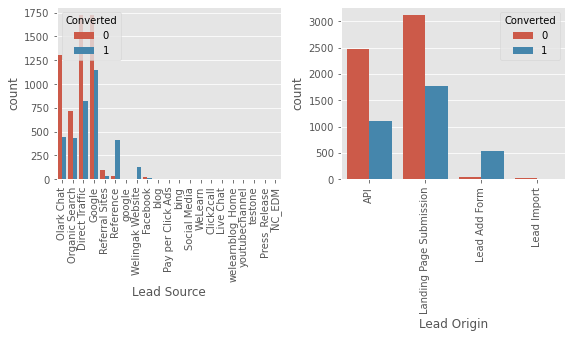

In [122]:
fig=plt.subplots(figsize=(12, 12))
for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(lead_df[feature], hue= lead_df['Converted'])
    plt.xticks(rotation=90)
    plt.tight_layout()
    

In [123]:
#observation
# API and Landing Page submission has less conversion rate(~30%) but counts of the leads from them are considerable
# The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
# Lead import has very less count as well as conversion rate and hence can be ignored

#To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of API and Landing page submission and also increasing the number of leads from 'Lead Add Form'





In [124]:
# we can clearly observe that the count of leads from various sources are close to negligable and hence we can club them into "Others" source for better visualisation and analysis
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 'Social Media', 'WeLearn', 'bing', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')
lead_df['Lead Source'] = lead_df['Lead Source'].replace("google", 'Google')

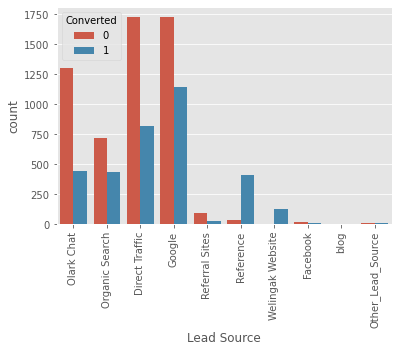

In [125]:
#plotting lead source again

sns.countplot(x= "Lead Source", hue= "Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

In [126]:
#observation
#The count of leads from the Google and Direct Traffic is maximum
#The conversi9on rate of the leads from Reference and Welingak Website is maximum


#To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark chat', 'Organic search', 'Direct traffic' and also increasing the number of laeds from 'Reference' and 'Welingak Website'


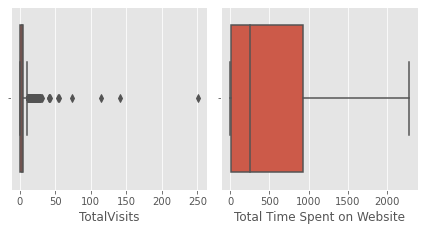

In [127]:
fig= plt.subplots(figsize= (6,6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace= 2.0)
    sns.boxplot(lead_df[feature])
    plt.tight_layout()

In [128]:
#there are lot of outliers in the Total visits columns and we csn cap this variable to 95 percentile

q1= lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"]>= q1]= q1

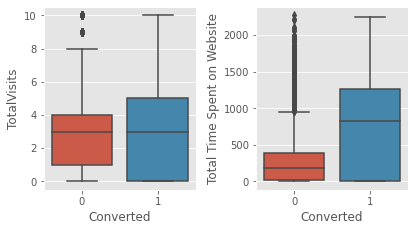

In [129]:
fig= plt.subplots(figsize= (6,6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace= 2.0)
    sns.boxplot(y= feature, x='Converted', data= lead_df)
    plt.tight_layout()

In [130]:
#observation
# the median of both the conversion and non-conversion and hence conclusive can be said using this information
# Uses spending more time on the website are more likely to get converted

#websites can be made appelaing so as to increase the time of the Users on websites 

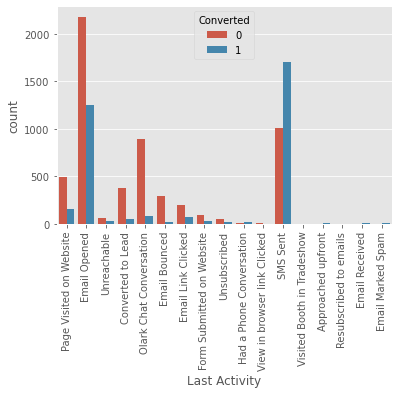

In [131]:
#plotting the last activity again

sns.countplot(x="Last Activity", hue= "Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

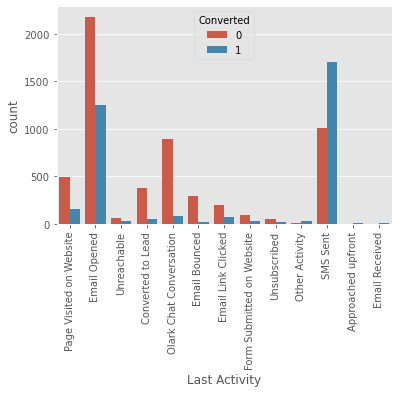

In [132]:
#converting all the low count categories to the 'others category'

lead_df['Last Activity']= lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approach upfront', 'Resubscribed to emails', 'Email received', 'Email Marked Spam'], 'Other Activity')

#lets plot the last activity again
sns.countplot(x="Last Activity", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

In [133]:
#observation
#the count of 1st activity as "Email opened" is max
# The conversion rate of SMS sent as last activity is maximum
#we should focus on increasing the conversion rate of those having last activity as Email opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent


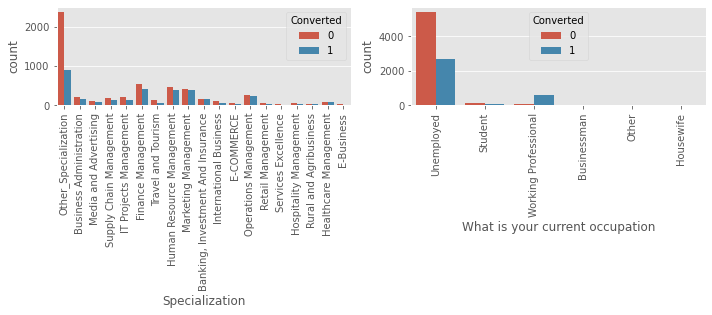

In [134]:
fig= plt.subplots(figsize= (10,6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace= 2.0)
    sns.countplot(x= feature, hue='Converted', data= lead_df)
    plt.xticks(rotation='vertical')
    plt.tight_layout()

In [135]:
#observation
#looking at above plot, no particular inference can be made for specialization
#looking at above plot, we can say that working professionals have high conversion rate
#number of unemployed leads are more thean any other category


#to increase overall conversion rate, we needto increase the number of working professional leads by reaching out to them through different social sites such as Linkedin etc. and also on increasing the conversion rate of unemployed leads
# country, what matters most to you in choosing a course, coty columns have most values corresponding to one value such as India for country, Mumbai for city and hence there is no particular insights for these columns


In [136]:
lead_df['What is your current occupation']= lead_df['What is your current occupation'].replace("Other", "Other_Occupation")

In [137]:
lead_df[[ "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


In [138]:
#observation
#we can clearly see that most values in the all the columns are 0 i.e., "NO" and hence inference can be made using these columns


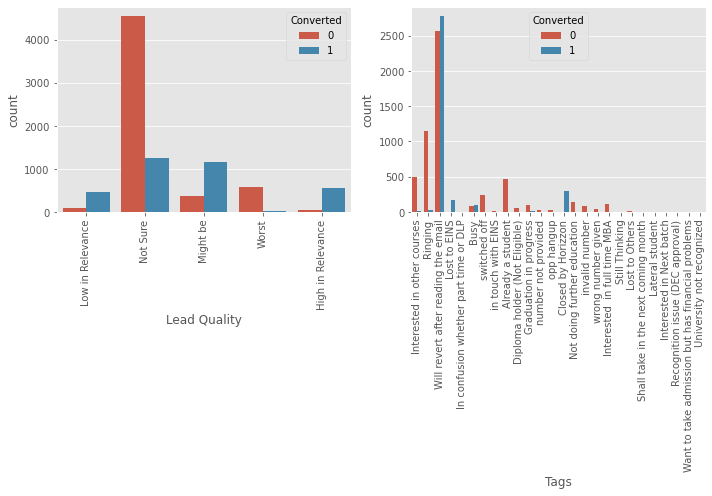

In [139]:
fig= plt.subplots(figsize= (10,10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace= 2.0)
    sns.countplot(x= feature, hue='Converted', data= lead_df)
    plt.xticks(rotation='vertical')
    plt.tight_layout()

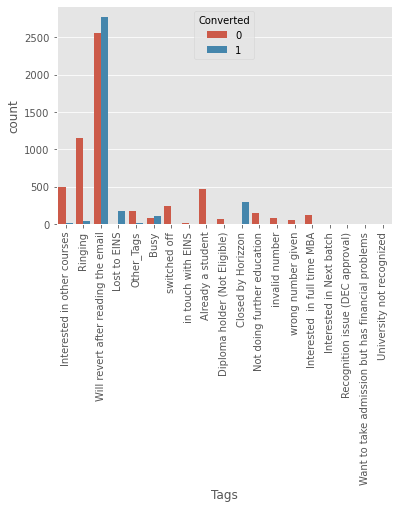

In [140]:
#converting all low count categories to others category
lead_df['Tags']=lead_df['Tags'].replace(['In confusion whether part time or DLP', 'In touch with EINS', 'Diploma holder(Not Eligible)', 'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup', 'Still Thinking', 'Lost to Others', 'Shall take in the next coming month', 'Lateral student','Interested in Next Batch', 'University not recognised'], 'Other_Tags')

#lets plot the tags again
sns.countplot(x="Tags", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

In [141]:
#observation
# will revert after reading the email and closed by horizaon have high conversion rate

# to improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission'Lead origins and also increasing the number of leads from 'Lead add form'
# to improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark chat', 'Organic search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak website'
# websites can be made more appealing to increase the time of the users on websites
# we should focus on incresing the conversion rate of those having last activity as email opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent
# to increase overall conversion rate, we need to increase the number of working professional leads by reaching out to them through different social sites such as Linkedin etc. and also increasing the conversion rate of Unemployed leads
# we also observed that there are multiple columns which contains data of a single value only. as these columns do not contribute towards any inference, we can remove them from further analysis


In [142]:
#dropping unnecessary columns

lead_df= lead_df.drop(['Lead Number', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview','Country','Do Not Call'], 1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [147]:
lead_df= pd.concat([lead_df, dummy], axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_blog,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [149]:
#test-train split
#putting feature variable to x

X = lead_df.drop(['Prospect ID', 'Converted'], axis=1)

#putting response variable to y

Y= lead_df['Converted']

print(Y)
X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_blog,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [150]:
#splitting the data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size= 0.3, random_state=100)

In [151]:
scaler= StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_blog,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [152]:
#checking the conversion rate

print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


In [153]:
#correlation between different numerical values for both the converted and not converted cases
conv_corr= lead_df.corr()

#unstacking the correlation matrx to find out top correlations
conv_corr_unstacked= conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                              0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                             0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.800686
TotalVisits                            Page Views Per Visit                              0.737996
Last Activity_Email Received           Last Notable Activity_Email Received              0.707068
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.691811
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.631722
dtype: float64

In [155]:
X_test = X_test.drop(['Lead Source_Facebook', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Lead Source_Facebook', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website'], 1)

In [156]:
conv_corr= X_train.corr()

In [157]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form     Lead Source_Reference                             0.859537
TotalVisits                   Page Views Per Visit                              0.756104
Last Activity_Email Received  Last Notable Activity_Email Received              0.707051
Last Activity_Other Activity  Last Notable Activity_Had a Phone Conversation    0.665877
Do Not Email                  Last Activity_Email Bounced                       0.624939
Lead Source_Olark Chat        Specialization_Other_Specialization               0.505771
Page Views Per Visit          Lead Origin_Landing Page Submission               0.493007
Lead Origin_Lead Add Form     Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced   Last Notable Activity_Email Bounced               0.450911
TotalVisits                   Lead Origin_Landing Page Submission               0.447765
dtype: float64

In [161]:
#model building
#logistic regression model

logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1271.9
Date:                Tue, 25 Oct 2022   Deviance:                       2543.8
Time:                        23:43:00   Pearson chi2:                 3.49e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     22.4660   7.96e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                              -1.4213      0.322     -4.412      0.000      -2.053      -0.790
TotalVisits                                                0.0669      0.085      0.783      0.434      -0.101       0.234
Total Time Spent on Website                                1.1463      0.063     18.088      0.000       1.022       1.271
Page Views Per Visit                                      -0.1131      0.085     -1.336      0.182      -0.279       0.053
Lead Origin_Landing Page Submission                       -1.0160      0.219     -4.630      0.000      -1.446      -0.586
Lead Origin_Lead Add Form                                 -0.4435      1.395     -0.318      0.751      -3.177       2.290
Lead Origin_Lead Import                                    1.1974      0.821      1.459      0.145      -0.412       2.807
Lead Source_Google                                         0.1904      0.153      1.248      0.212      -0.109       0.489
Lead Source_Olark Chat                                     1.0189      0.228      4.477      0.000       0.573       1.465
Lead Source_Organic Search                                 0.1905      0.207      0.922      0.357      -0.214       0.596
Lead Source_Other_Lead_Source                              1.2743      0.901      1.414      0.157      -0.492       3.040
Lead Source_Reference                                      1.9454      1.447      1.345      0.179      -0.890       4.781
Lead Source_Referral Sites                                -0.1215      0.492     -0.247      0.805      -1.085       0.842
Lead Source_Welingak Website                               5.6546      1.583      3.572      0.000       2.552       8.757
Lead Source_blog                                         -24.3270   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Last Activity_Converted to Lead                          -20.5334   7.96e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Email Bounced                              -21.0496   7.96e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Email Link Clicked                         -21.3517   7.96e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Email Opened                               -20.9388   7.96e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Email Received                               1.6540    2.3e+05   7.19e-06      1.000   -4.51e+05    4.51e+05
Last Activity_Form Submitted on Website                  -20.3739   7.96e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Act

In [162]:
#starting with 15 features selected by RFE
#we will then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train,Y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 61),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 58),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Google', False, 52),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 53),
 ('Lead Source_Other_Lead_Source', False, 29),
 ('Lead Source_Reference', False, 68),
 ('Lead Source_Referral Sites', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_blog', False, 39),
 ('Last Activity_Converted to Lead', False, 40),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 31),
 ('Last Activity_Email Received', False, 66),
 ('Last Activity_Form Submitted on Website', False, 71),
 ('Last Activity_Olark Chat Conversation', False, 26),
 ('Last Activity_Other Activity', False, 8),
 ('Last 

In [164]:
col= X_train.columns[rfe.support_]

In [ ]:
#assessing the model with statmodels

